In [ ]:
"""
This database is a collection of 303 patient records, tracking the presence of heart disease alongside the health details of the 
patients themselves.The target variable, labeled "goal," indicates the presence of heart disease in a patient, 
with values ranging from 0 (no disease) to 4 (increasing severity). 
"""

In [6]:
import sys
!{sys.executable} -m pip install ucimlrepo

import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

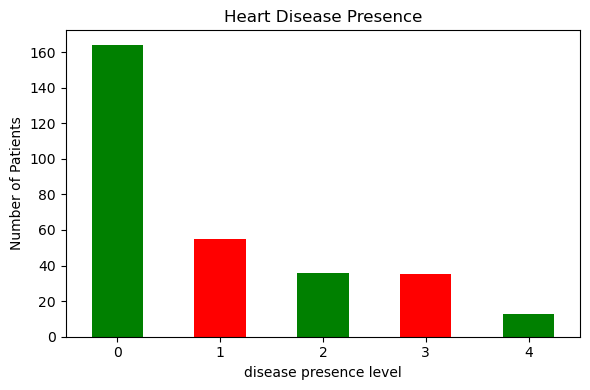

In [28]:
X = heart_disease.data.features
y = heart_disease.data.targets
df = X.copy()
df['num'] = y['num']  # Add the 'num' target column to the features
# Count of patients with and without heart disease
disease_counts = df['num'].value_counts()

plt.figure(figsize=(6,4))
disease_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Heart Disease Presence')
plt.xlabel('disease presence level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

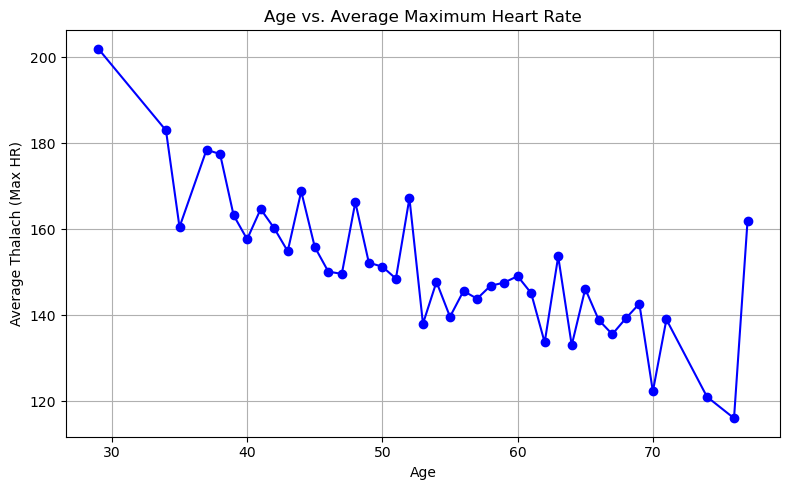

In [16]:
# Grouped average heart rate by age
age_hr = df.groupby('age')['thalach'].mean()

plt.figure(figsize=(8,5))
plt.plot(age_hr.index, age_hr.values, marker='o', color='blue')
plt.title('Age vs. Average Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Average Thalach (Max HR)')
plt.grid(True)
plt.tight_layout()
plt.show()


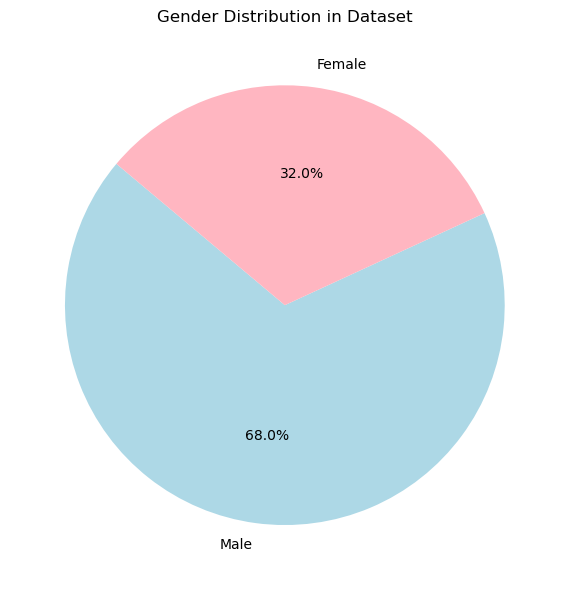

In [18]:
gender_counts = df['sex'].value_counts()
labels = ['Male', 'Female']

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution in Dataset')
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

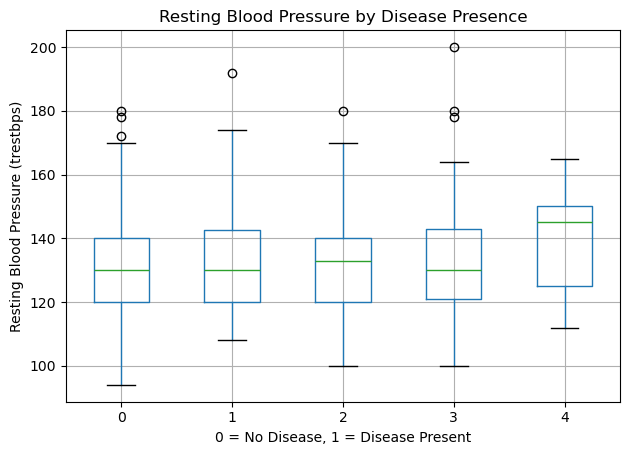

In [20]:
plt.figure(figsize=(6,5))
df.boxplot(column='trestbps', by='num')
plt.title('Resting Blood Pressure by Disease Presence')
plt.suptitle('')
plt.xlabel('0 = No Disease, 1 = Disease Present')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.tight_layout()
plt.show()
